In [46]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

# Read the CSV file back into a DataFrame
combined_df = pd.read_csv('./processed_data/combined_bitcoin_data.csv')

# Windows sizes to aggregate
moving_averages_window_size = [20,50,100]
rsi_window_size = [20,50,100]


### MOVING-AVERAGE

In [47]:
# Convert 'open_time' to datetime format (assuming it is in UNIX timestamp format)
combined_df['open_time'] = pd.to_datetime(combined_df['open_time'], unit='ms')
# Set 'open_time' as the index
combined_df.set_index('open_time', inplace=True)

# Calculate the moving average of the 'close' price
for n in moving_averages_window_size:
    combined_df['moving_average_{}'.format(n)] = combined_df['close'].rolling(window=n).mean()

### RSI

In [48]:

# Define a function to calculate RSI
def calculate_rsi(data, window):
    delta = data.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Calculate RSI for each window size
for n in rsi_window_size:
    combined_df['rsi_{}'.format(n)] = calculate_rsi(combined_df['close'], n)

# Save the updated DataFrame to a new CSV file
combined_df.to_csv('./processed_data/aggregated_bitcoin_data.csv')



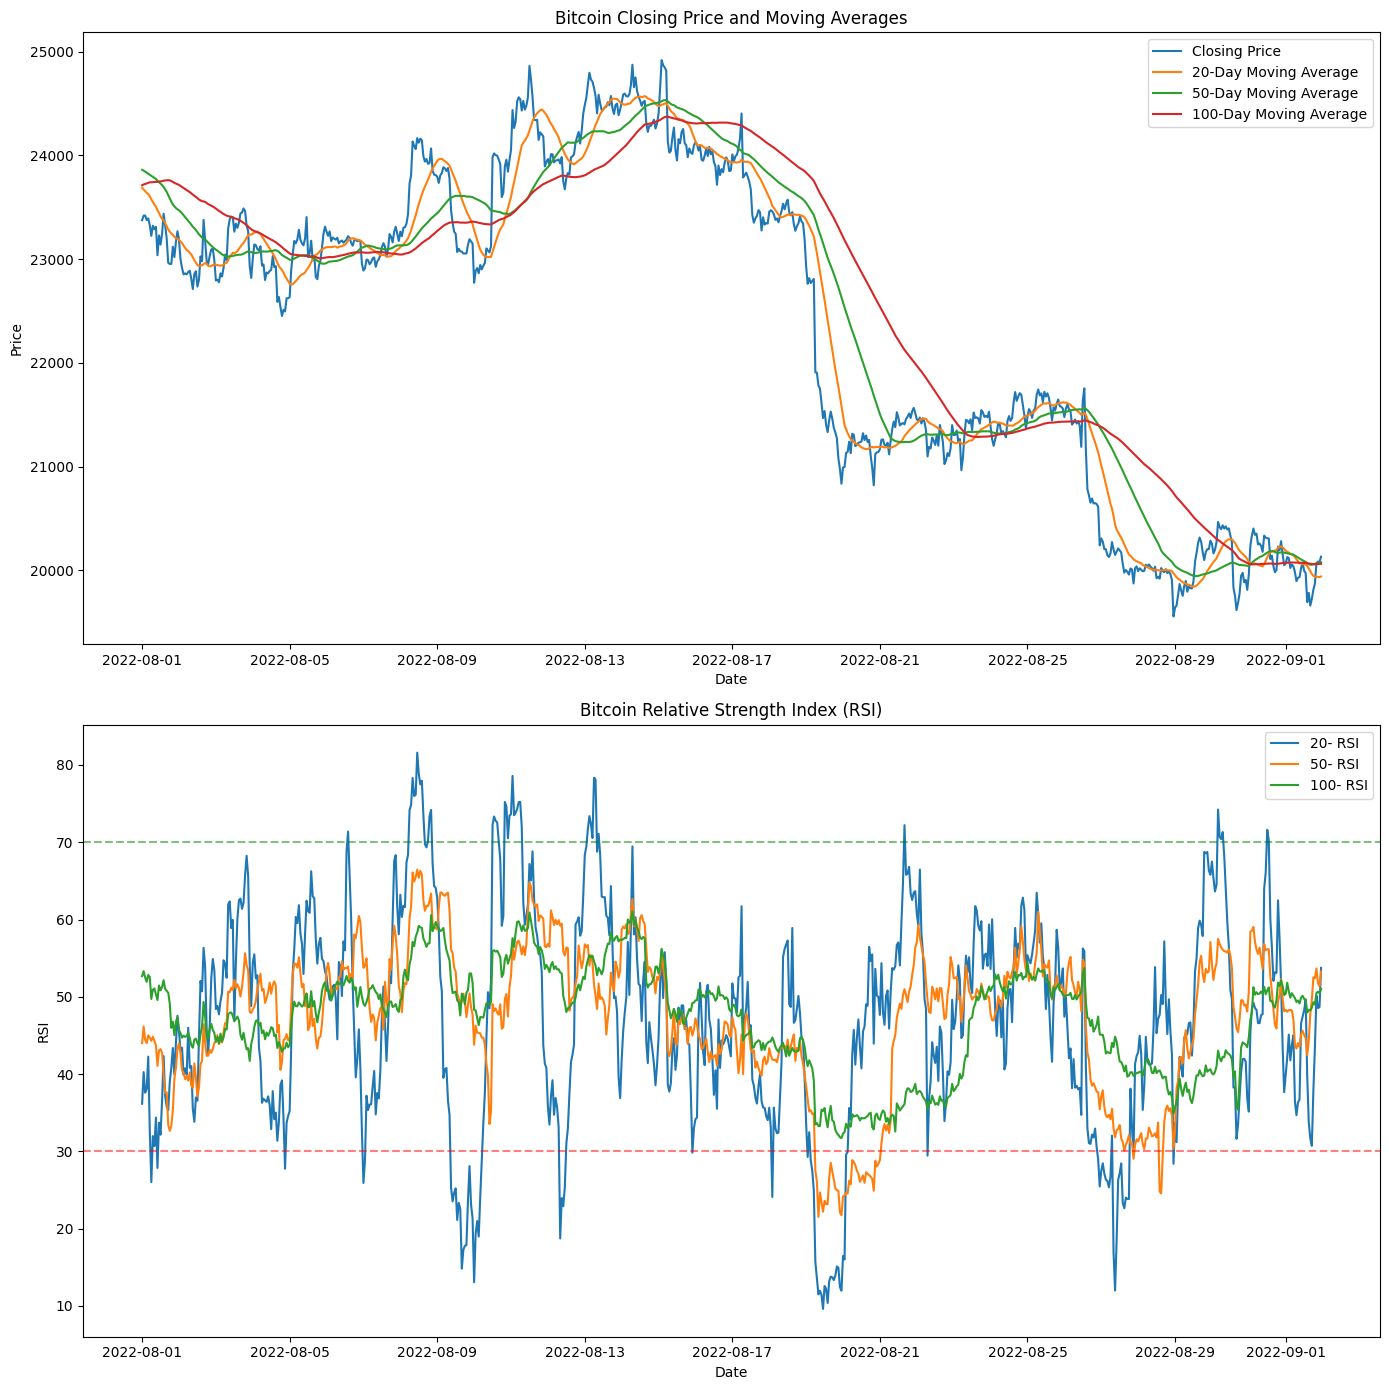

,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,ignore,moving_average_20,moving_average_50,moving_average_100,rsi_20,rsi_50,rsi_100
open_time,,,,,,,,,,,,,,,,,
2022-08-01 00:00:00,23296.36,23394.97,23257.37,23374.96,5110.59195,1659315599999,1.192090e+08,184426,2652.53834,6.187558e+07,0,23686.0895,23860.0458,23711.8990,36.158733,44.009392,52.670147
2022-08-01 01:00:00,23376.65,23443.38,23323.52,23418.80,3835.70981,1659319199999,8.973913e+07,156253,1929.95992,4.515590e+07,0,23671.4965,23852.9468,23719.3086,40.254311,46.154280,53.322661
2022-08-01 02:00:00,23418.80,23466.55,23371.23,23420.08,3510.57616,1659322799999,8.222161e+07,143965,1741.44104,4.078711e+07,0,23653.7095,23842.9526,23724.7755,37.591908,44.410540,52.494973
2022-08-01 03:00:00,23420.08,23436.83,23313.38,23375.62,3051.23770,1659326399999,7.128112e+07,135771,1482.54058,3.463491e+07,0,23636.8355,23832.1180,23729.0072,38.076934,43.996959,51.937373
2022-08-01 04:00:00,23376.59,23417.76,23344.65,23392.40,3465.72905,1659329999999,8.104752e+07,131321,1684.84243,3.940219e+07,0,23626.6465,23823.2646,23735.0780,42.252300,45.022410,52.818154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-01 19:00:00,19812.93,19907.00,19780.11,19871.68,8463.44571,1662062399999,1.678386e+08,208743,4345.48482,8.618010e+07,0,19938.7605,20061.5466,20058.4309,43.435950,52.394264,49.003939
2022-09-01 20:00:00,19871.68,20099.83,19841.45,20068.72,10970.63433,1662065999999,2.193841e+08,244348,5844.91940,1.168881e+08,0,19938.9750,20067.3924,20059.2047,50.139187,53.667921,50.501583
2022-09-01 21:00:00,20070.25,20169.41,20039.91,20084.23,5616.73402,1662069599999,1.128247e+08,150102,2836.30950,5.697768e+07,0,19936.8140,20070.1330,20060.2261,48.553141,51.789300,50.661542


In [49]:
start = '2022-08-01'
end = '2022-09-01'
combined_df = combined_df[start:end]
# Plot the closing price, moving average, and RSI
plt.figure(figsize=(14, 14))

# Plot the closing price and moving average
plt.subplot(2, 1, 1)
plt.plot(combined_df['close'], label='Closing Price')
for n in moving_averages_window_size:
    plt.plot(combined_df['moving_average_{}'.format(n)], label='{}-Day Moving Average'.format(n))
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin Closing Price and Moving Averages')
plt.legend()

# Plot the RSI
plt.subplot(2, 1, 2)
for n in rsi_window_size:
    plt.plot(combined_df['rsi_{}'.format(n)], label='{}- RSI'.format(n))
plt.axhline(30, linestyle='--', alpha=0.5, color='red')
plt.axhline(70, linestyle='--', alpha=0.5, color='green')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.title('Bitcoin Relative Strength Index (RSI)')
plt.legend()

plt.tight_layout()
plt.show()

combined_df